In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Demographical Visualization Project
In this short data visualization project, I used two DataFrames from $\href{https://worldpopulationreview.com}{World Population Review}$ in order to see if there is any association between the percentage of atheists and the percentage of people in poverty, using data on 62 countries. This projects highlights my ability to create data visualizations using the libraries pandas, matplotlib, and seaborn.

In [3]:
#first viewing available columns
pd.read_csv("most-atheist-countries-2023.csv").columns

Index(['place', 'pop2023', 'growthRate', 'area', 'country', 'cca3', 'cca2',
       'ccn3', 'region', 'subregion', 'unMember', 'officialName', 'landAreaKm',
       'density', 'densityMi', 'Rank', 'mostAtheistCountries_religiousPerson',
       'mostAtheistCountries_totalAth',
       'mostAtheistCountries_notReligiousPerson',
       'mostAtheistCountries_convincedAtheist',
       'mostAtheistCountries_doNotKnow'],
      dtype='object')

In [4]:
#reading in atheism data and selecting useful columns
atheist = pd.read_csv("most-atheist-countries-2023.csv")
atheist = atheist[["country", "mostAtheistCountries_totalAth"]]

In [5]:
atheist

,country,mostAtheistCountries_totalAth
0,India,6
1,China,91
2,United States,43
3,Indonesia,42
4,Pakistan,7
...,...,...
60,Slovenia,59
61,Latvia,62
62,Estonia,72
63,Fiji,8


In [7]:
#reading in table with poverty data
poverty_rates = pd.read_csv("poverty-rate-by-country-2023.csv")
poverty_rates = poverty_rates[["povertyRateByCountry_percPoverty", "country"]]

In [15]:
#merging tables on country and cleaning table
atheist_poverty = pd.merge(atheist, poverty_rates, on = "country")
atheist_poverty = atheist_poverty.rename(columns={"mostAtheistCountries_totalAth": "Percent_Atheist", "povertyRateByCountry_percPoverty": "Percent_Poverty"})
atheist_poverty = atheist_poverty[atheist_poverty['country'] != 'Iran'][atheist_poverty['country'] != 'South Korea']
atheist_poverty

/var/folders/_p/kkyy31fn0kj_gp3_9lhdmkb40000gn/T/ipykernel_26957/2488678995.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  atheist_poverty = atheist_poverty[atheist_poverty['country'] != 'Iran'][atheist_poverty['country'] != 'South Korea']


,country,Percent_Atheist,Percent_Poverty
0,India,6,21.9
1,China,91,0.6
2,United States,43,17.8
3,Indonesia,42,9.4
4,Pakistan,7,24.3
...,...,...,...
59,Slovenia,59,12.0
60,Latvia,62,22.9
61,Estonia,72,21.7
62,Fiji,8,29.9


In [17]:
#reseting index
atheist_poverty.index = np.arange(62)

In [18]:
atheist_poverty

,country,Percent_Atheist,Percent_Poverty
0,India,6,21.9
1,China,91,0.6
2,United States,43,17.8
3,Indonesia,42,9.4
4,Pakistan,7,24.3
...,...,...,...
57,Slovenia,59,12.0
58,Latvia,62,22.9
59,Estonia,72,21.7
60,Fiji,8,29.9


In [21]:
#Calculating correlation, slope, and intercept of the best fit line
r_arr = np.corrcoef(np.array(atheist_poverty['Percent_Poverty']), np.array(atheist_poverty['Percent_Atheist']))
r = r_arr[0][1]
r
slope = r * (np.std(atheist_poverty['Percent_Atheist']) / np.std(atheist_poverty['Percent_Poverty']))
intercept = np.mean(atheist_poverty['Percent_Atheist']) - (slope * np.mean(atheist_poverty['Percent_Poverty']))
print("Correlation: ", r)
print("Slope:", slope, ", Intercept:", intercept)


Correlation:  -0.5573600163941186
Slope: -1.2939357327643028 , Intercept: 66.07659274636056


In [22]:
#exploring alternate way to compute slope and intercept of best fit line
np.polyfit(np.array(atheist_poverty['Percent_Poverty']), np.array(atheist_poverty['Percent_Atheist']), 1)

array([-1.29393573, 66.07659275])

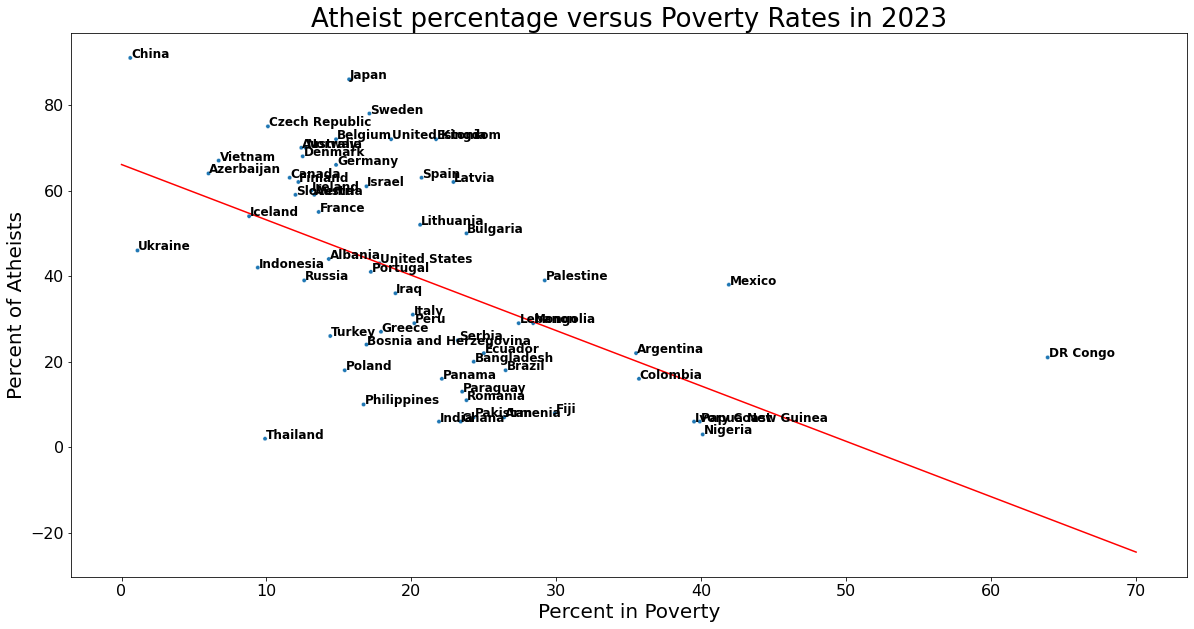

In [33]:
#creating scatterplot visualization with line of best fit overlaid
%matplotlib inline


plt.figure(figsize=(20,10))

p1 = sns.scatterplot(x='Percent_Poverty', # Horizontal axis
       y='Percent_Atheist', # Vertical axis
       data=atheist_poverty, # Data source
       size = 8,
       legend=False)  

for line in range(0,atheist_poverty.shape[0]):
     p1.text(atheist_poverty.Percent_Poverty[line]+0.06, atheist_poverty.Percent_Atheist[line], 
     atheist_poverty.country[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold', fontsize = 12)
        
x = np.linspace(0, 70, 1000)
y = slope * x + intercept

plt.plot(x, y, color='r')

plt.title('Atheist percentage versus Poverty Rates in 2023', fontsize = 26)
# Set x-axis label
plt.xlabel('Percent in Poverty', fontsize = 20)
plt.xticks(fontsize = 16)
# Set y-axis label
plt.ylabel('Percent of Atheists', fontsize = 20)
plt.yticks(fontsize = 16)

plt.show()

Correlation Coefficient: -0.5573600163941186

## Takeaways
This graph shows that there is a negative correlation between atheism and poverty, meaning that countries with higher poverty rates are associated with lower percentages of atheists. While I overlaid a line of best fit, I can tell that there would be a non-linear relationship in the residuals of this scatterplot, meaning that a linear model would not be best suited for making predictions on this data.